# **CO₂ Emissions and Global Temperature Prediction**

## **Project Overview**
The main goal of this project is to analyze the impact of CO₂ emissions on the annual average temperature and to examine temperature changes over months and years.

## **Data Sources**
- **GCB2022v27_MtCO2_flat.csv**  
  - Contains data on CO₂ emissions, including country-level and global data over the years.  
  - CO₂ emissions are categorized by source: **Coal, Oil, Gas, Cement, Flaring, and Other emissions**.  
  - The dataset also includes **Total emissions** and **Per Capita emissions**. This project primarily focuses on **Total emissions**.  

- **GlobalLandTemperaturesByCountry.csv**  
  - Contains temperature data for each country on a monthly basis.  

## **Project Workflow**
### **1. Exploratory Data Analysis (EDA)**
- Performed an in-depth analysis of CO₂ emissions and global temperature trends.

### **2. Machine Learning for Prediction**
- Built models to predict **CO₂ emissions over the years**.
- Developed models to predict **annual average global temperature based on CO₂ emissions**.

### **3. LSTM Model for Temperature Prediction**
- Used an LSTM model to predict **monthly global temperatures**, then calculated the **annual average temperature**.

### **4. Comparison of Results**
- Evaluated and compared different prediction approaches.

### **5. Conclusions**
- Summarized key findings from the analysis and predictions.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

Load CO2 Emission data

In [2]:
data_co2 = pd.read_csv("GCB2022v27_MtCO2_flat.csv")

In [3]:
data_co2.head()

Country ISO 3166-1 alpha-3  Year  Total  Coal  Oil  Gas  Cement  \
0  Afghanistan                AFG  1750    0.0   NaN  NaN  NaN     NaN   
1  Afghanistan                AFG  1751    0.0   NaN  NaN  NaN     NaN   
2  Afghanistan                AFG  1752    0.0   NaN  NaN  NaN     NaN   
3  Afghanistan                AFG  1753    0.0   NaN  NaN  NaN     NaN   
4  Afghanistan                AFG  1754    0.0   NaN  NaN  NaN     NaN   

   Flaring  Other  Per Capita  
0      NaN    NaN         NaN  
1      NaN    NaN         NaN  
2      NaN    NaN         NaN  
3      NaN    NaN         NaN  
4      NaN    NaN         NaN

In [4]:
data_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [5]:
data_co2.isnull().sum()

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

In [6]:
data_co2 = data_co2.dropna(subset='Total')

In [7]:
data_co2.fillna(0, inplace=True)

In [8]:
data_co2.head()

Country ISO 3166-1 alpha-3  Year  Total  Coal  Oil  Gas  Cement  \
0  Afghanistan                AFG  1750    0.0   0.0  0.0  0.0     0.0   
1  Afghanistan                AFG  1751    0.0   0.0  0.0  0.0     0.0   
2  Afghanistan                AFG  1752    0.0   0.0  0.0  0.0     0.0   
3  Afghanistan                AFG  1753    0.0   0.0  0.0  0.0     0.0   
4  Afghanistan                AFG  1754    0.0   0.0  0.0  0.0     0.0   

   Flaring  Other  Per Capita  
0      0.0    0.0         0.0  
1      0.0    0.0         0.0  
2      0.0    0.0         0.0  
3      0.0    0.0         0.0  
4      0.0    0.0         0.0

In [9]:
data_co2 = data_co2[data_co2['Year'] >= 1950]
data_co2.head()

Country ISO 3166-1 alpha-3  Year     Total      Coal       Oil  Gas  \
200  Afghanistan                AFG  1950  0.084272  0.021068  0.063204  0.0   
201  Afghanistan                AFG  1951  0.091600  0.025648  0.065952  0.0   
202  Afghanistan                AFG  1952  0.091600  0.031708  0.059892  0.0   
203  Afghanistan                AFG  1953  0.106256  0.037949  0.068307  0.0   
204  Afghanistan                AFG  1954  0.106256  0.042502  0.063754  0.0   

     Cement  Flaring  Other  Per Capita  
200     0.0      0.0    0.0    0.011266  
201     0.0      0.0    0.0    0.012098  
202     0.0      0.0    0.0    0.011946  
203     0.0      0.0    0.0    0.013685  
204     0.0      0.0    0.0    0.013511

In [10]:
data_co2.sort_values('Year', ascending=False).head()

Country ISO 3166-1 alpha-3  Year         Total          Coal  \
63103      Global                WLD  2021  37123.850352  14979.598083   
37535     Morocco                MAR  2021     70.577665     27.844789   
37263  Montserrat                MSR  2021      0.020678      0.000000   
36991  Montenegro                MNE  2021      1.751386      0.786839   
36719    Mongolia                MNG  2021     50.315914     44.400088   

                Oil          Gas       Cement     Flaring       Other  \
63103  11837.159116  7921.829472  1672.592372  416.525563  296.145746   
37535     36.158632     1.573744     5.000500    0.000000    0.000000   
37263      0.020678     0.000000     0.000000    0.000000    0.000000   
36991      0.964547     0.000000     0.000000    0.000000    0.000000   
36719      5.428566     0.000000     0.487261    0.000000    0.000000   

       Per Capita  
63103    4.693699  
37535    1.903564  
37263    4.681398  
36991    2.789458  
36719   15.029627

The newest data are from 2021, checking what countries had the highest co2 emissions in this year

In [11]:
latest_year = data_co2[data_co2['Year'] == 2021]
top_emitters = latest_year.nlargest(11, 'Total')

top_emitters[['Country', 'Total']]

Country         Total
63103                   Global  37123.850352
10879                    China  11472.369171
60111                      USA   5007.335889
25567                    India   2709.683625
47327                   Russia   1755.547390
27743                    Japan   1067.398435
62831  International Transport   1021.749204
26655                     Iran    748.878752
21487                  Germany    674.753566
49503             Saudi Arabia    672.379870
25839                Indonesia    619.277533

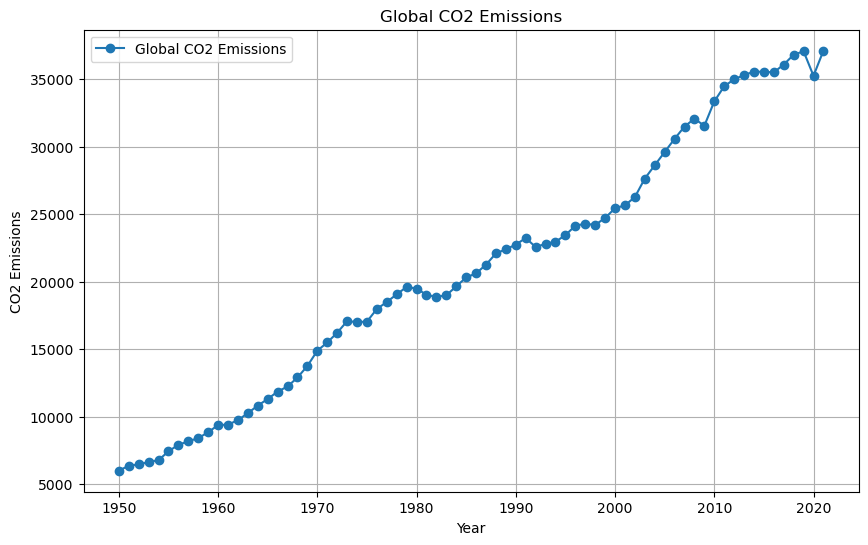

In [12]:
global_co2 = data_co2[data_co2['Country'] == 'Global']

plt.figure(figsize=(10,6))
plt.plot(global_co2['Year'], global_co2['Total'], marker = 'o', label = 'Global CO2 Emissions')
plt.title('Global CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.grid()
plt.show()

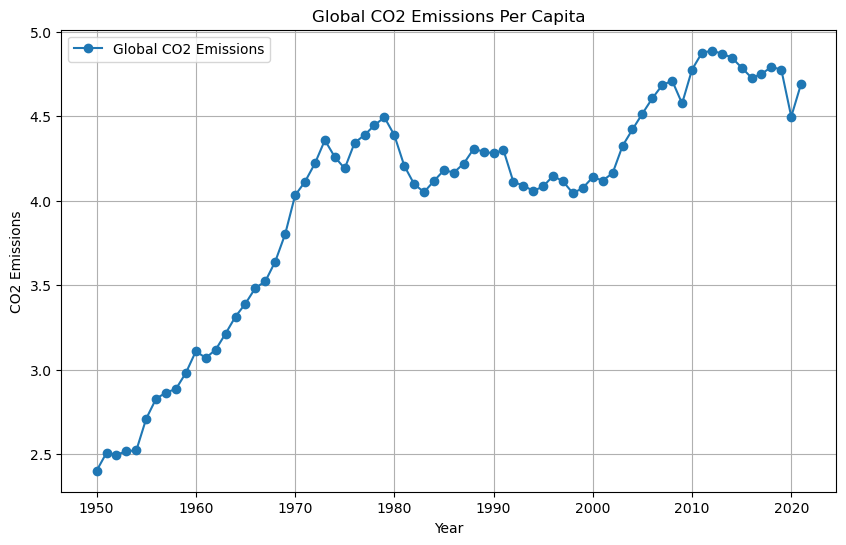

In [13]:
plt.figure(figsize=(10,6))
plt.plot(global_co2['Year'], global_co2['Per Capita'], marker = 'o', label = 'Global CO2 Emissions')
plt.title('Global CO2 Emissions Per Capita')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.grid()
plt.show()

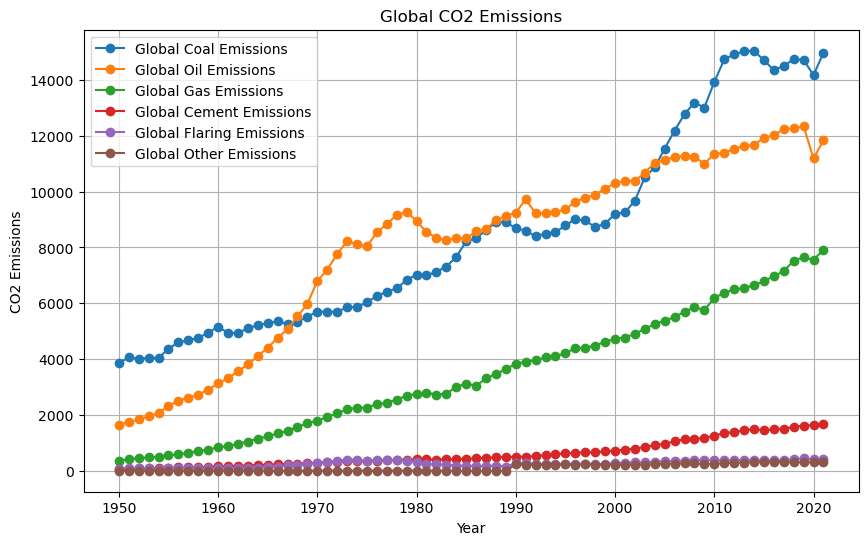

In [14]:
plt.figure(figsize=(10,6))
plt.plot(global_co2['Year'], global_co2['Coal'], marker = 'o', label = 'Global Coal Emissions')
plt.plot(global_co2['Year'], global_co2['Oil'], marker = 'o', label = 'Global Oil Emissions')
plt.plot(global_co2['Year'], global_co2['Gas'], marker = 'o', label = 'Global Gas Emissions')
plt.plot(global_co2['Year'], global_co2['Cement'], marker = 'o', label = 'Global Cement Emissions')
plt.plot(global_co2['Year'], global_co2['Flaring'], marker = 'o', label = 'Global Flaring Emissions')
plt.plot(global_co2['Year'], global_co2['Other'], marker = 'o', label = 'Global Other Emissions')
plt.title('Global CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.grid()
plt.show()

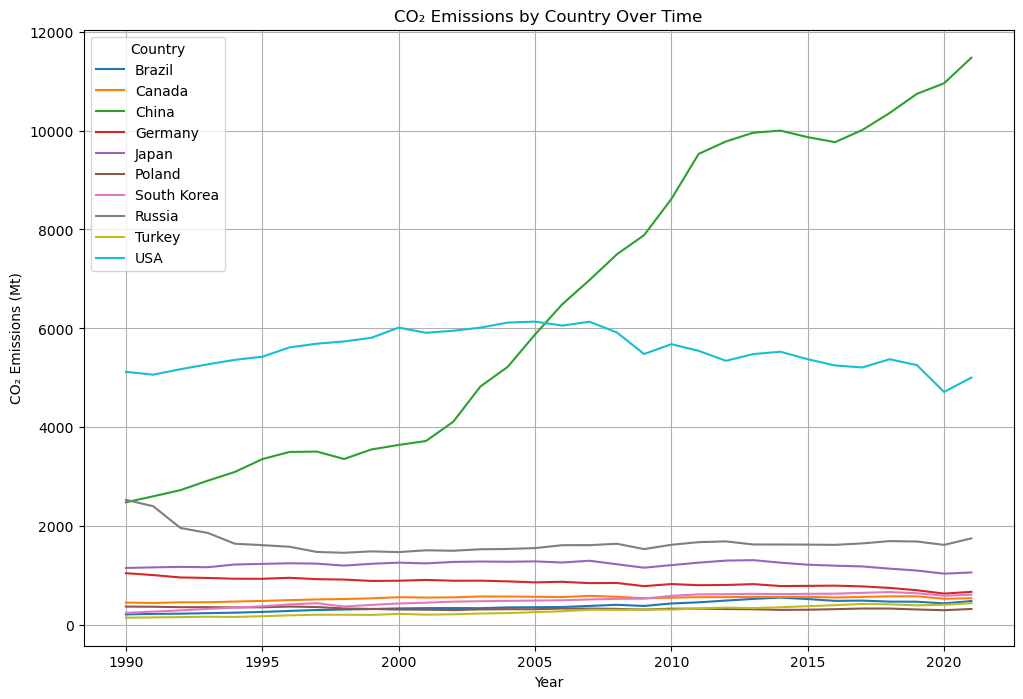

In [15]:
countries = ['China', 'USA', 'Russia', 'Japan', 'Germany', 'South Korea', 'Canada', 'Brazil', 'Turkey', 'Poland']
filtered_data = data_co2[data_co2['Country'].isin(countries)]

plt.figure(figsize=(12, 8))
sns.lineplot(data=filtered_data, x=data_co2['Year'][data_co2['Year']>=1990], y='Total', hue='Country')
plt.title('CO₂ Emissions by Country Over Time')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (Mt)')
plt.legend(title='Country')
plt.grid()
plt.show()

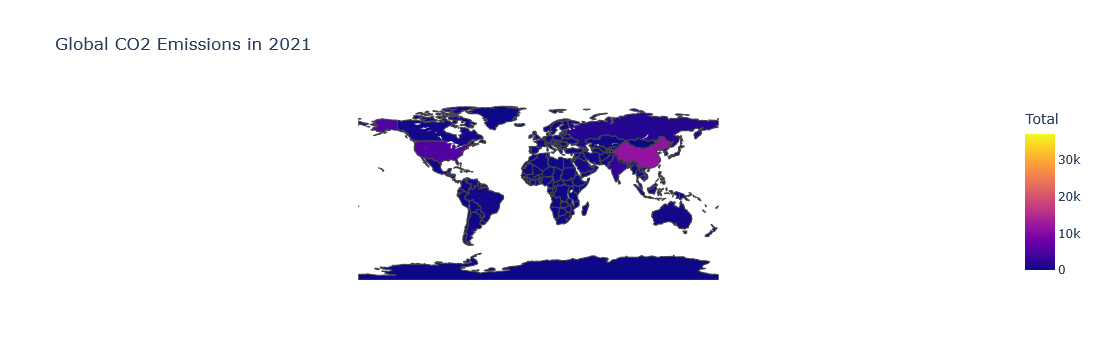

In [16]:
fig = px.choropleth(latest_year,
                    locations="Country",
                    locationmode="country names",
                    color="Total",
                    title="Global CO2 Emissions in 2021",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()

Load temperature data

In [17]:
data_temp = pd.read_csv("GlobalLandTemperaturesByCountry.csv")

In [18]:
data_temp.head()

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland

In [19]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [20]:
data_temp.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [21]:
data_temperature = data_temp.dropna()

In [22]:
data_temperature.head()

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
5  1744-04-01               1.530                          4.680   Åland
6  1744-05-01               6.702                          1.789   Åland
7  1744-06-01              11.609                          1.577   Åland
8  1744-07-01              15.342                          1.410   Åland

In [23]:
data_temperature['Year'] = pd.to_datetime(data_temperature['dt']).dt.year

Counting average yearly temperature for every country

In [24]:
data_temperature_year = data_temperature.groupby(['Year', 'Country'])['AverageTemperature'].mean().reset_index()
data_temperature_year_global = data_temperature_year.groupby(['Year'])['AverageTemperature'].mean().reset_index()
data_temperature_year_global['Country'] = 'Global'

In [25]:
data_temperature_year_global

Year  AverageTemperature Country
0    1743            5.184140  Global
1    1744            9.837898  Global
2    1745            1.387125  Global
3    1750            9.129353  Global
4    1751            9.167388  Global
..    ...                 ...     ...
262  2009           19.546385  Global
263  2010           19.629806  Global
264  2011           19.456040  Global
265  2012           19.468744  Global
266  2013           19.850897  Global

[267 rows x 3 columns]

In [26]:
data_temperature_year = pd.concat([data_temperature_year, data_temperature_year_global])

In [27]:
data_temperature_year

Year  Country  AverageTemperature
0    1743  Albania            8.620000
1    1743  Andorra            7.556000
2    1743  Austria            2.482000
3    1743  Belarus            0.767000
4    1743  Belgium            7.106000
..    ...      ...                 ...
262  2009   Global           19.546385
263  2010   Global           19.629806
264  2011   Global           19.456040
265  2012   Global           19.468744
266  2013   Global           19.850897

[46182 rows x 3 columns]

How is it look like in Poland?

In [28]:
data_temperature_year[data_temperature_year['Country']=='Poland']

Year Country  AverageTemperature
36     1743  Poland            3.937000
86     1744  Poland            9.321125
136    1745  Poland           -0.971750
186    1750  Poland            8.344818
236    1751  Poland            8.283625
...     ...     ...                 ...
44878  2009  Poland            8.652917
45120  2010  Poland            7.621417
45362  2011  Poland            8.951667
45604  2012  Poland            8.537750
45846  2013  Poland            9.257875

[267 rows x 3 columns]

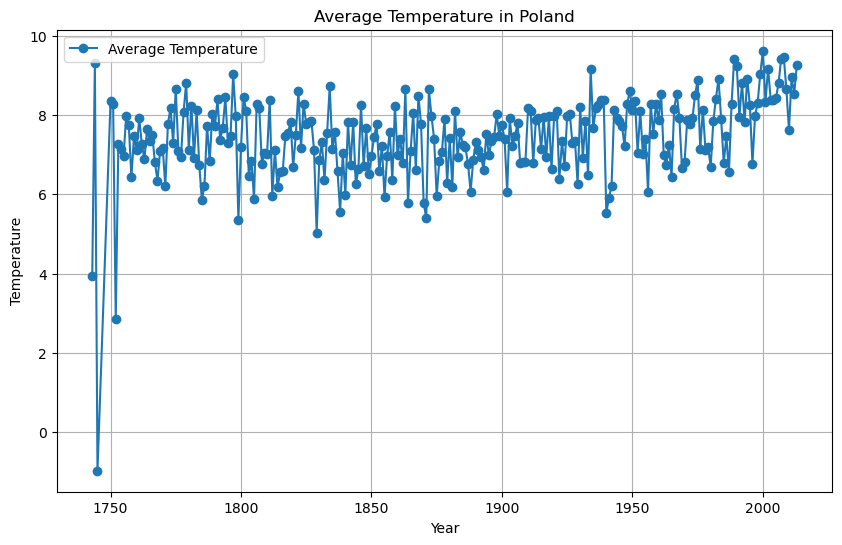

In [29]:
plt.figure(figsize=(10,6))
plt.plot(data_temperature_year[data_temperature_year['Country']=='Poland']['Year'], 
         data_temperature_year[data_temperature_year['Country']=='Poland']['AverageTemperature'], marker = 'o', label = 'Average Temperature')
plt.title('Average Temperature in Poland')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.grid()
plt.show()

Checking year range

In [30]:
print("The oldest data is from ", data_temperature_year['Year'].min(), "\nThe newest data is from ", data_temperature_year['Year'].max())

The oldest data is from  1743 
The newest data is from  2013


We only consider data from 1950

In [31]:
data_temperature_year = data_temperature_year[data_temperature_year['Year'] >= 1950]

where is the highest average yearly temperature

In [32]:
highest_year_temp = data_temperature_year[data_temperature_year['Year'] == 2013]
top_temp = highest_year_temp.nlargest(15, 'AverageTemperature')

top_temp[['Country', 'AverageTemperature']]

Country  AverageTemperature
45732              Djibouti           30.744750
45807                  Mali           29.942000
45706          Burkina Faso           29.385500
45901  United Arab Emirates           29.370625
45864               Senegal           29.301500
45828                 Niger           29.231375
45810            Mauritania           29.110000
45754                Gambia           28.724375
45849                 Qatar           28.573750
45880                 Sudan           28.572000
45684                 Aruba           28.541250
45739               Eritrea           28.503500
45715                  Chad           28.356000
45709              Cambodia           28.259625
45836                  Oman           28.194375

where is the lowest yearly temperature

In [33]:
lowest_year_temp = data_temperature_year[data_temperature_year['Year'] == 2013]
last_temp = lowest_year_temp.nsmallest(15, 'AverageTemperature')

last_temp[['Country', 'AverageTemperature']]

Country  AverageTemperature
45760                                  Greenland          -15.409750
45730                                    Denmark          -14.927250
45882                     Svalbard And Jan Mayen           -5.382000
45852                                     Russia           -2.263125
45711                                     Canada           -1.640667
45834                                     Norway            1.735375
45876  South Georgia And The South Sandwich Isla            2.228625
45816                                   Mongolia            2.807750
45774                                    Iceland            2.920250
45770          Heard Island And Mcdonald Islands            3.193750
45747                                    Finland            4.064125
45884                                     Sweden            4.199750
45831                              North America            5.073889
45752        French Southern And Antarctic Lands            5.685500
45799                              Liechtenstein            6.002375

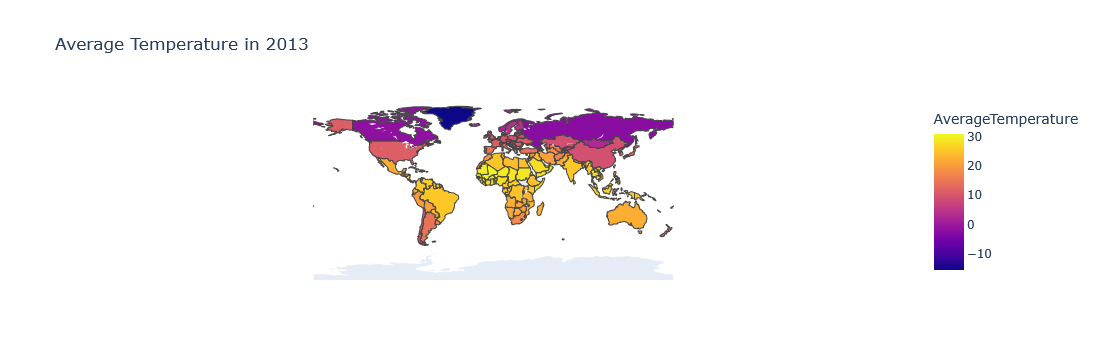

In [34]:
fig = px.choropleth(lowest_year_temp,
                    locations="Country",
                    locationmode="country names",
                    color="AverageTemperature",
                    title="Average Temperature in 2013",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()

In [35]:
global_temp = data_temperature_year[(data_temperature_year['Country'] == 'Global') & (data_temperature_year['Year'] >= 1950)]
global_temp

Year Country  AverageTemperature
203  1950  Global           18.588817
204  1951  Global           18.775119
205  1952  Global           18.805691
206  1953  Global           18.855640
207  1954  Global           18.580321
..    ...     ...                 ...
262  2009  Global           19.546385
263  2010  Global           19.629806
264  2011  Global           19.456040
265  2012  Global           19.468744
266  2013  Global           19.850897

[64 rows x 3 columns]

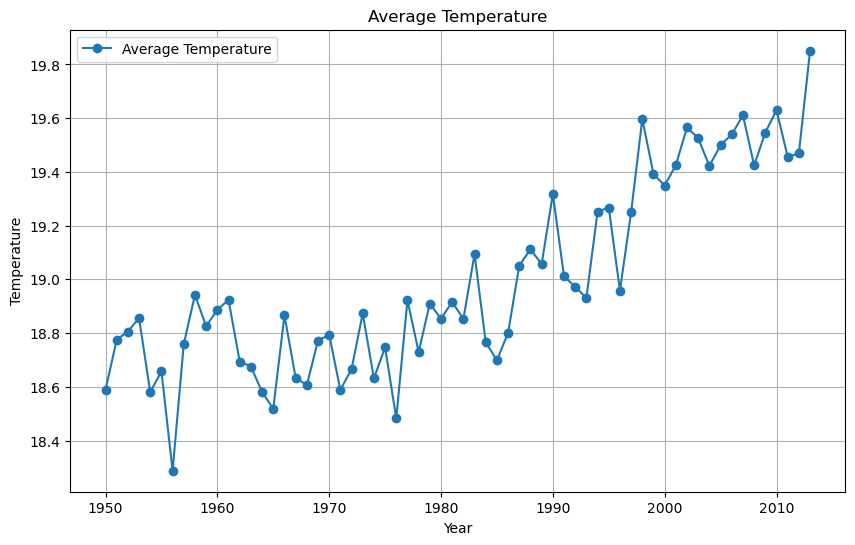

In [36]:
plt.figure(figsize=(10,6))
plt.plot(global_temp['Year'], global_temp['AverageTemperature'], marker = 'o', label = 'Average Temperature')
plt.title('Average Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.grid()
plt.show()

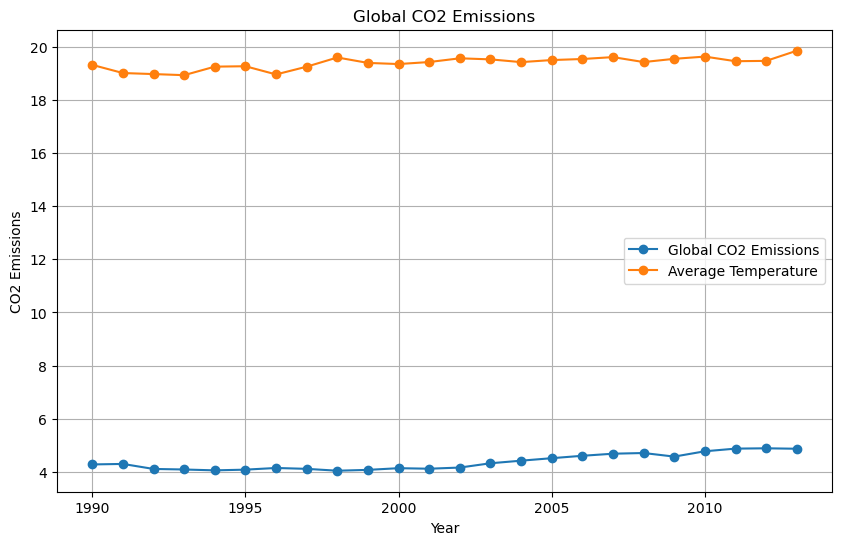

In [37]:
plt.figure(figsize=(10,6))
plt.plot(global_co2['Year'][(global_co2['Year']>=1990) & (global_co2['Year']<=2013)], global_co2['Per Capita'][(global_co2['Year']>=1990) & (global_co2['Year']<=2013)], marker = 'o', label = 'Global CO2 Emissions')
plt.plot(global_temp['Year'][(global_temp['Year']>=1990) & (global_temp['Year']<=2013)], global_temp['AverageTemperature'][(global_temp['Year']>=1990) & (global_temp['Year']<=2013)], marker = 'o', label = 'Average Temperature')
plt.title('Global CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.grid()
plt.show()

In [38]:
global_temp.head()

Year Country  AverageTemperature
203  1950  Global           18.588817
204  1951  Global           18.775119
205  1952  Global           18.805691
206  1953  Global           18.855640
207  1954  Global           18.580321

In [39]:
global_co2.head()

Country ISO 3166-1 alpha-3  Year        Total         Coal          Oil  \
63032  Global                WLD  1950  6003.271922  3856.215025  1648.309543   
63033  Global                WLD  1951  6379.796307  4060.039800  1742.354432   
63034  Global                WLD  1952  6465.726953  4009.059071  1838.023921   
63035  Global                WLD  1953  6647.763209  4043.705068  1952.100332   
63036  Global                WLD  1954  6789.968651  4039.512096  2068.542651   

              Gas     Cement    Flaring  Other  Per Capita  
63032  353.156200  66.978938  73.624416    0.0    2.401960  
63033  416.186336  75.839229  79.875260    0.0    2.508639  
63034  447.085044  80.840562  85.363804    0.0    2.496159  
63035  474.527427  89.627553  81.348030    0.0    2.517826  
63036  501.349623  97.230969  77.612011    0.0    2.522296

In [40]:
merge_table = pd.merge(global_temp, global_co2, on='Year', how='outer')
merge_table = merge_table[['Year', 'AverageTemperature', 'Total', 'Per Capita']]

In [41]:
merge_table = merge_table.dropna()

In [42]:
merge_table.head()

Year  AverageTemperature        Total  Per Capita
0  1950           18.588817  6003.271922    2.401960
1  1951           18.775119  6379.796307    2.508639
2  1952           18.805691  6465.726953    2.496159
3  1953           18.855640  6647.763209    2.517826
4  1954           18.580321  6789.968651    2.522296

In [43]:
merge_table['Total'].corr(merge_table['AverageTemperature'])

0.8399881068466613

In [44]:
merge_table['Per Capita'].corr(merge_table['AverageTemperature'])

0.5982991696907528

In [45]:
merge_table.corr()

Year  AverageTemperature     Total  Per Capita
Year                1.000000            0.854126  0.990508    0.866789
AverageTemperature  0.854126            1.000000  0.839988    0.598299
Total               0.990508            0.839988  1.000000    0.897160
Per Capita          0.866789            0.598299  0.897160    1.000000

In [46]:
merge_table.describe()

Year  AverageTemperature         Total  Per Capita
count    64.000000           64.000000     64.000000   64.000000
mean   1981.500000           19.000585  19111.901385    3.909998
std      18.618987            0.359586   8267.595873    0.678640
min    1950.000000           18.287587   6003.271922    2.401960
25%    1965.750000           18.742376  11729.599503    3.460633
50%    1981.500000           18.912840  19289.227878    4.118565
75%    1997.250000           19.325565  24235.591142    4.329323
max    2013.000000           19.850897  35319.201624    4.887984

Checking correlations in data - Total CO2 emissions and average temperature have the highest correlation (0,84)

In [47]:
data_years = np.array(range(2014, 2125))
predicted_values = pd.DataFrame(data_years, columns=['Year'])

In [52]:
def predict_co2(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    print(f"Mean absolute error (MAE): {mae:.2f}")
    print(f"Mean squared error (MSE): {mse:.2f}")
    print(f"Root mean squared error (RMSE): {mse:.2f}")
    print(f"Coefficient of determination (R^2): {r2:.2f}")
    print(f"Vector:, {model.intercept_:.2f}")
    coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
    print(coeff_df)
    
    merge_table['PredictedCO2'] = model.predict(X)
    
    predicted_values['Total'] = model.predict(predicted_values['Year'].to_numpy().reshape(-1, 1))

In [53]:
def predict_temp(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    print(f"Mean absolute error (MAE): {mae:.2f}")
    print(f"Mean squared error (MSE): {mse:.2f}")
    print(f"Root mean squared error (RMSE): {mse:.2f}")
    print(f"Coefficient of determination (R^2): {r2:.2f}")
    print(f"Vector:, {model.intercept_:.2f}")
    coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
    print(coeff_df)

    merge_table['PredictedTemp'] = model.predict(X)

    predicted_values['PredictedTemp'] = model.predict(predicted_values[['Year', 'Total']])

In [54]:
predict_co2(merge_table[['Year']], merge_table['Total'])

Mean absolute error (MAE): 915.09
Mean squared error (MSE): 1311030.90
Root mean squared error (RMSE): 1311030.90
Coefficient of determination (R^2): 0.99
Vector:, -844616.39
      Coefficients
Year    435.892619


In [55]:
predict_temp(merge_table[['Year', 'Total']], merge_table['AverageTemperature'])

Mean absolute error (MAE): 0.12
Mean squared error (MSE): 0.02
Root mean squared error (RMSE): 0.02
Coefficient of determination (R^2): 0.83
Vector:, -21.57
       Coefficients
Year       0.020554
Total     -0.000009


In [56]:
merge_table.head()

Year  AverageTemperature        Total  Per Capita  PredictedCO2  \
0  1950           18.588817  6003.271922    2.401960   5374.215984   
1  1951           18.775119  6379.796307    2.508639   5810.108603   
2  1952           18.805691  6465.726953    2.496159   6246.001222   
3  1953           18.855640  6647.763209    2.517826   6681.893841   
4  1954           18.580321  6789.968651    2.522296   7117.786460   

   PredictedTemp  
0      18.454989  
1      18.472250  
2      18.492052  
3      18.511014  
4      18.530325

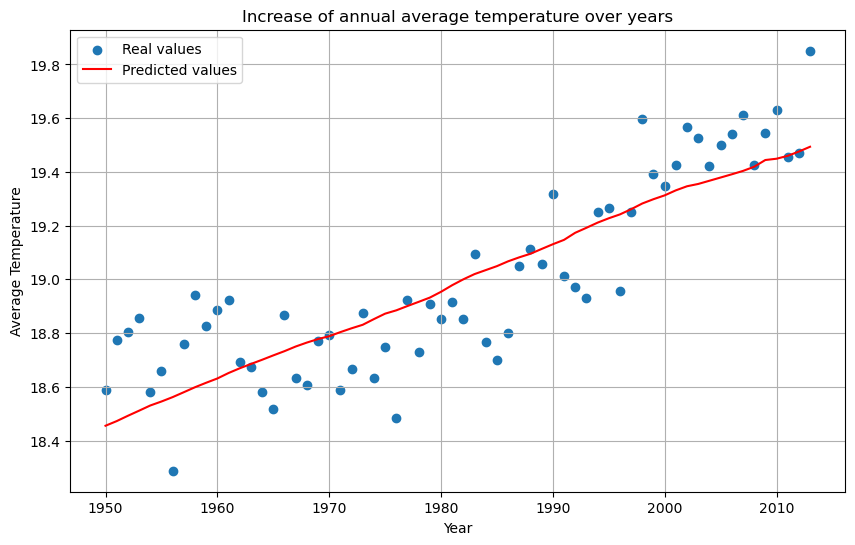

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(merge_table['Year'], merge_table['AverageTemperature'], label='Real values')
plt.plot(merge_table['Year'], merge_table['PredictedTemp'], color='red', label='Predicted values')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Increase of annual average temperature over years')
plt.legend()
plt.grid()
plt.show()

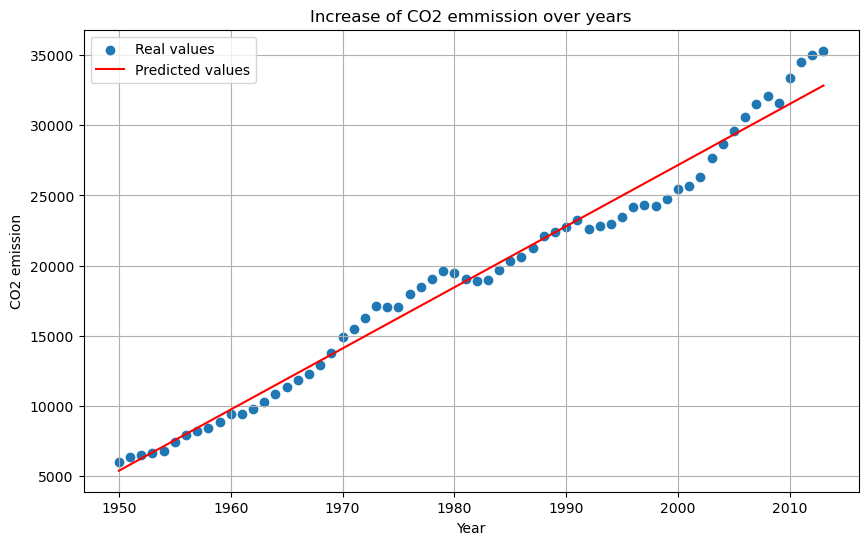

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(merge_table['Year'], merge_table['Total'], label='Real values')
plt.plot(merge_table['Year'], merge_table['PredictedCO2'], color='red', label='Predicted values')
plt.xlabel('Year')
plt.ylabel('CO2 emission')
plt.title('Increase of CO2 emmission over years')
plt.legend()
plt.grid()
plt.show()

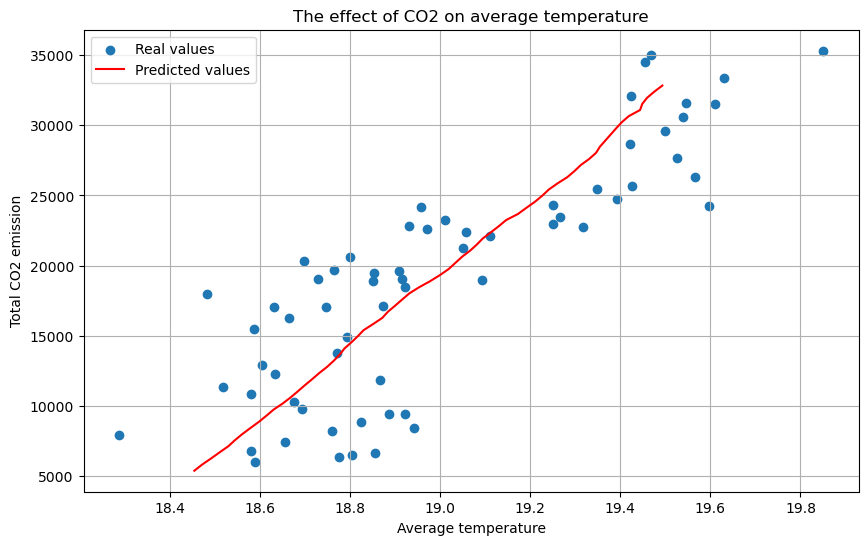

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(merge_table['AverageTemperature'], merge_table['Total'], label='Real values')
plt.plot(merge_table['PredictedTemp'], merge_table['PredictedCO2'], color='red', label='Predicted values')
plt.xlabel('Average temperature')
plt.ylabel('Total CO2 emission')
plt.title('The effect of CO2 on average temperature')
plt.legend()
plt.grid()
plt.show()

In [60]:
predicted_values

Year         Total  PredictedTemp
0    2014  33271.343607      19.531913
1    2015  33707.236227      19.548654
2    2016  34143.128846      19.565395
3    2017  34579.021465      19.582136
4    2018  35014.914084      19.598877
..    ...           ...            ...
106  2120  79475.961234      21.306453
107  2121  79911.853853      21.323194
108  2122  80347.746473      21.339935
109  2123  80783.639092      21.356676
110  2124  81219.531711      21.373417

[111 rows x 3 columns]

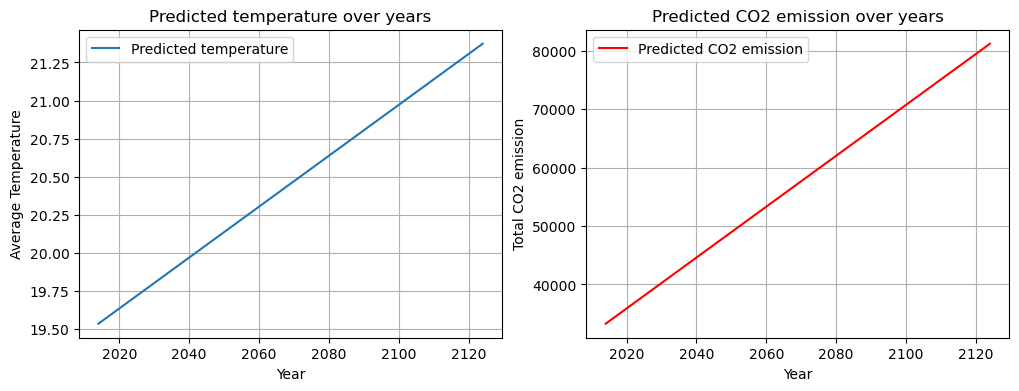

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(predicted_values['Year'], predicted_values['PredictedTemp'], label='Predicted temperature')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Average Temperature')
ax[0].legend()
ax[0].grid()
ax[0].set_title('Predicted temperature over years')

ax[1].plot(predicted_values['Year'], predicted_values['Total'], color='red', label='Predicted CO2 emission')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Total CO2 emission')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Predicted CO2 emission over years')

plt.show()

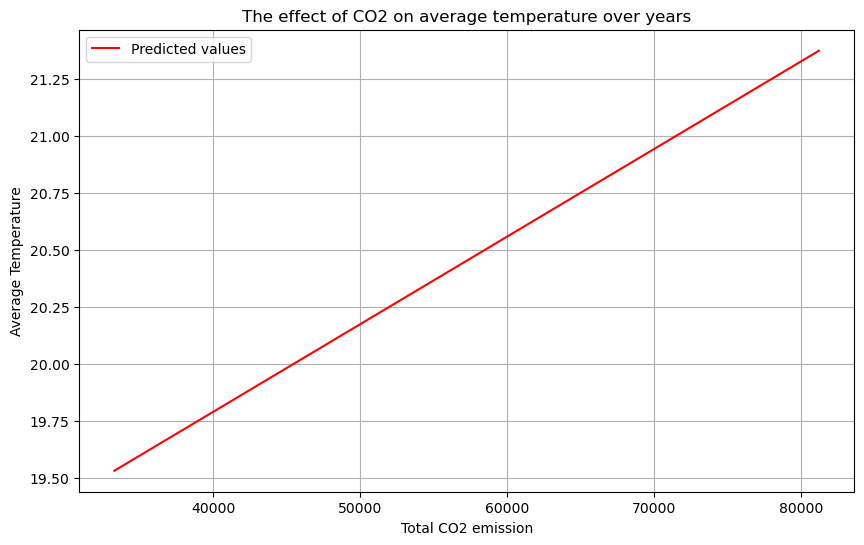

In [62]:
plt.figure(figsize=(10,6))
plt.plot(predicted_values['Total'], predicted_values['PredictedTemp'], color='red', label='Predicted values')
plt.xlabel('Total CO2 emission')
plt.ylabel('Average Temperature')
plt.title('The effect of CO2 on average temperature over years')
plt.legend()
plt.grid()
plt.show()

In [63]:
merge_table

Year  AverageTemperature         Total  Per Capita  PredictedCO2  \
0   1950           18.588817   6003.271922    2.401960   5374.215984   
1   1951           18.775119   6379.796307    2.508639   5810.108603   
2   1952           18.805691   6465.726953    2.496159   6246.001222   
3   1953           18.855640   6647.763209    2.517826   6681.893841   
4   1954           18.580321   6789.968651    2.522296   7117.786460   
..   ...                 ...           ...         ...           ...   
59  2009           19.546385  31564.030692    4.575621  31091.880512   
60  2010           19.629806  33364.346496    4.776158  31527.773131   
61  2011           19.456040  34487.011618    4.875781  31963.665750   
62  2012           19.468744  35006.267581    4.887984  32399.558369   
63  2013           19.850897  35319.201624    4.871215  32835.450988   

    PredictedTemp  
0       18.454989  
1       18.472250  
2       18.492052  
3       18.511014  
4       18.530325  
..            ...  
59      19.444078  
60      19.448881  
61      19.459614  
62      19.475625  
63      19.493442  

[64 rows x 6 columns]

# LSTM 

Global temperature prediction for each month using LSTM model

In [64]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [65]:
data_temp_global = data_temp.copy()

In [66]:
data_temp_global['Country'] = 'Global'

In [67]:
data_temp_global['Year'] = pd.to_datetime(data_temp['dt']).dt.year

In [68]:
data_temp_global = data_temp_global[data_temp_global['Year'] >= 1950]

In [69]:
data_temp_global = data_temp_global.dropna()

In [70]:
X = data_temp_global[['dt']]
y = data_temp_global['AverageTemperature']

Data normalization

In [71]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_temp_global['AverageTemperature'] = scaler.fit_transform(data_temp_global[['AverageTemperature']])

Preparing data to LSTM model

In [72]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [73]:
seq_length = 12
X, y = create_sequences(data_temp_global['AverageTemperature'].values, seq_length)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Creating LSTM model

In [75]:
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

In [76]:
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

training the model

In [77]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
4623/4623 [==============================] - 346s 72ms/step - loss: 0.0015 - accuracy: 1.3521e-05 - val_loss: 6.4223e-04 - val_accuracy: 0.0000e+00
Epoch 2/20
4623/4623 [==============================] - 81s 18ms/step - loss: 6.0770e-04 - accuracy: 1.3521e-05 - val_loss: 4.6857e-04 - val_accuracy: 0.0000e+00
Epoch 3/20
4623/4623 [==============================] - 73s 16ms/step - loss: 4.6844e-04 - accuracy: 1.3521e-05 - val_loss: 4.3024e-04 - val_accuracy: 0.0000e+00
Epoch 4/20
4623/4623 [==============================] - 71s 15ms/step - loss: 4.2654e-04 - accuracy: 1.3521e-05 - val_loss: 4.0625e-04 - val_accuracy: 0.0000e+00
Epoch 5/20
4623/4623 [==============================] - 72s 16ms/step - loss: 4.0494e-04 - accuracy: 1.3521e-05 - val_loss: 3.8109e-04 - val_accuracy: 0.0000e+00
Epoch 6/20
4623/4623 [==============================] - 79s 17ms/step - loss: 3.8594e-04 - accuracy: 1.3521e-05 - val_loss: 3.8920e-04 - val_accuracy: 0.0000e+00
Epoch 7/20
4623/4623 [=========

Predictions

In [78]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))  # Denormalizacja

y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

1156/1156 [==============================] - 6s 4ms/step


In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_actual, predictions)
mse = mean_squared_error(y_test_actual, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, predictions)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

MAE: 0.81
MSE: 1.82
RMSE: 1.35
R^2 Score: 0.98


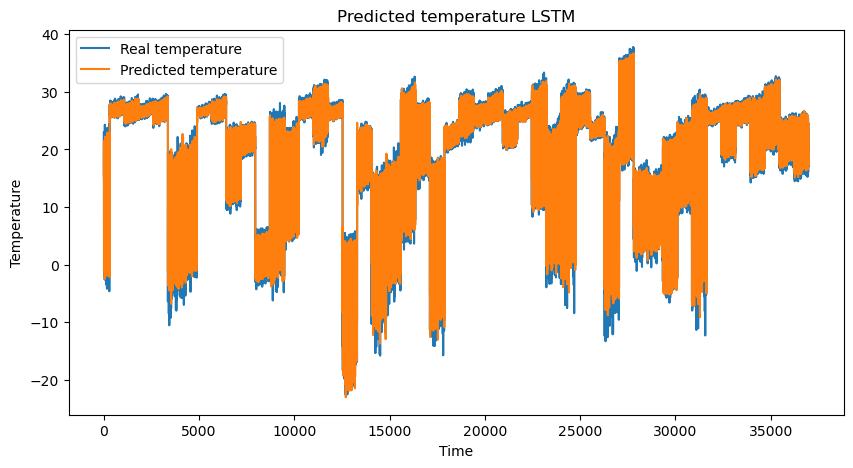

In [80]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Real temperature')
plt.plot(predictions, label='Predicted temperature')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Predicted temperature LSTM')
plt.show()

In [81]:
test_dates = data_temp_global['dt'].iloc[-len(y_test_actual):].values

In [82]:
comparison_df = pd.DataFrame({
    'Date': test_dates,
    'Real_temperature': y_test_actual.flatten(),
    'Predicted_temperature': predictions.flatten()
})
print(comparison_df.head(20))

          Date  Real_temperature  Predicted_temperature
0   1988-05-01            15.666              14.751909
1   1988-06-01            18.301              19.491247
2   1988-07-01            23.030              21.275797
3   1988-08-01            21.942              21.427105
4   1988-09-01            16.630              18.171719
5   1988-10-01            10.338              11.555852
6   1988-11-01            -0.247               5.732494
7   1988-12-01             0.643              -1.194529
8   1989-01-01            -0.731              -0.362784
9   1989-02-01             3.545               0.390848
10  1989-03-01             8.477               6.184074
11  1989-04-01            12.910              11.382139
12  1989-05-01            14.121              16.462132
13  1989-06-01            16.655              18.996471
14  1989-07-01            20.272              20.661150
15  1989-08-01            20.361              20.055279
16  1989-09-01            15.997              16

In [83]:
from datetime import datetime, timedelta

Prediction for 120 months (10 years)

In [84]:
future_predictions = []
last_sequence = X_test[-1]

last_date = pd.to_datetime(test_dates[-1])
future_dates = [last_date + timedelta(days=i) for i in range(1, 121)]

In [85]:
for _ in range(120):
    next_pred = model.predict(last_sequence.reshape(1, seq_length, 1))
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_pred

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 [==============================] - 0s 19ms/step


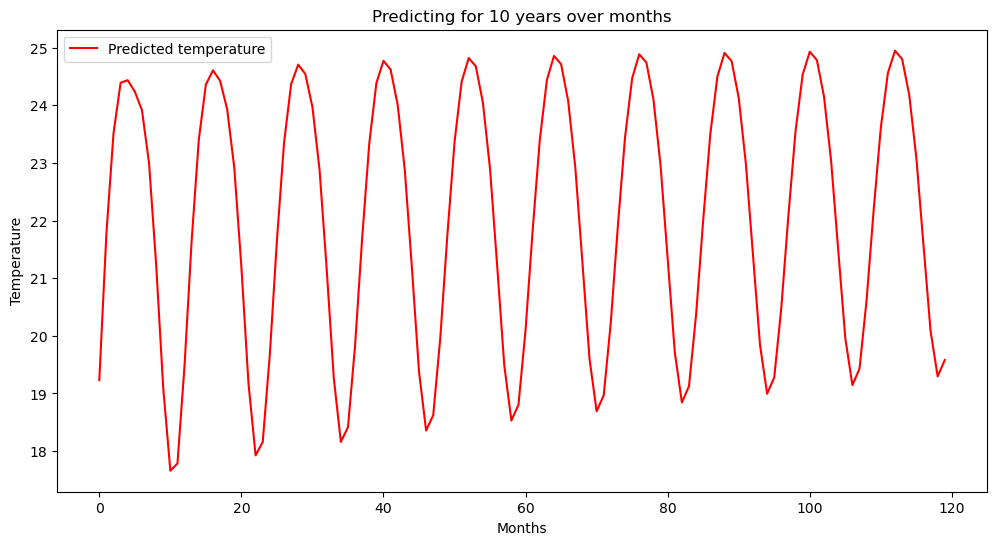

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(future_predictions, label='Predicted temperature', color='red')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.title('Predicting for 10 years over months')
plt.legend()
plt.show()

In [87]:
comparison_df.head()

Date  Real_temperature  Predicted_temperature
0  1988-05-01            15.666              14.751909
1  1988-06-01            18.301              19.491247
2  1988-07-01            23.030              21.275797
3  1988-08-01            21.942              21.427105
4  1988-09-01            16.630              18.171719

In [88]:
comparison_df['Year'] = pd.to_datetime(comparison_df['Date']).dt.year

In [89]:
comparison_df_year_1 = comparison_df.groupby(['Year'])['Real_temperature'].mean().reset_index()
comparison_df_year_1 = comparison_df_year_1.groupby(['Year'])['Real_temperature'].mean().reset_index()

In [90]:
comparison_df_year_2 = comparison_df.groupby(['Year'])['Predicted_temperature'].mean().reset_index()
comparison_df_year_2 = comparison_df_year_2.groupby(['Year'])['Predicted_temperature'].mean().reset_index()

In [91]:
comparison_df_year = pd.merge(comparison_df_year_1, comparison_df_year_2, on='Year', how='outer')

In [92]:
comparison_df_year

Year  Real_temperature  Predicted_temperature
0   1950         18.552477              19.498514
1   1951         18.643224              18.601965
2   1952         18.778845              18.710110
3   1953         18.845592              18.780537
4   1954         18.606660              18.711910
..   ...               ...                    ...
59  2009         19.374168              19.272642
60  2010         19.477328              19.421606
61  2011         19.290080              19.336420
62  2012         19.358685              19.312346
63  2013         19.718841              19.673550

[64 rows x 3 columns]

In [93]:
all_predicted_values = pd.merge(comparison_df_year, merge_table, on='Year', how='outer')

In [94]:
all_predicted_values = all_predicted_values[['Year', 'Real_temperature','Predicted_temperature', 'PredictedTemp']]
all_predicted_values.rename(columns={'Year':'Year', 'Real_temperature':'Real_temperature','Predicted_temperature':'Predicted_temperature_LSTM', 
                                 'PredictedTemp': 'Predicted_temperature_Regression'}, inplace=True)

In [95]:
all_predicted_values

Year  Real_temperature  Predicted_temperature_LSTM  \
0   1950         18.552477                   19.498514   
1   1951         18.643224                   18.601965   
2   1952         18.778845                   18.710110   
3   1953         18.845592                   18.780537   
4   1954         18.606660                   18.711910   
..   ...               ...                         ...   
59  2009         19.374168                   19.272642   
60  2010         19.477328                   19.421606   
61  2011         19.290080                   19.336420   
62  2012         19.358685                   19.312346   
63  2013         19.718841                   19.673550   

    Predicted_temperature_Regression  
0                          18.454989  
1                          18.472250  
2                          18.492052  
3                          18.511014  
4                          18.530325  
..                               ...  
59                         19.444078  
60                         19.448881  
61                         19.459614  
62                         19.475625  
63                         19.493442  

[64 rows x 4 columns]

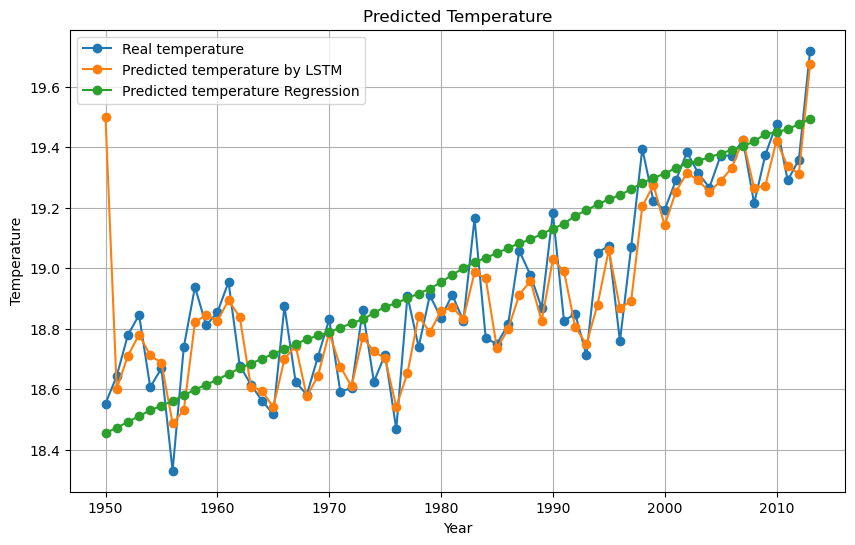

In [96]:
plt.figure(figsize=(10,6))
plt.plot(global_temp['Year'], all_predicted_values['Real_temperature'], marker = 'o', label = 'Real temperature')
plt.plot(global_temp['Year'], all_predicted_values['Predicted_temperature_LSTM'], marker = 'o', label = 'Predicted temperature by LSTM')
plt.plot(global_temp['Year'], all_predicted_values['Predicted_temperature_Regression'], marker = 'o', label = 'Predicted temperature Regression')
plt.title('Predicted Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.grid()
plt.show()

## **Conclusions**

1. **CO₂ Emissions and Temperature Correlation**  
   - The analysis confirms a strong correlation between **CO₂ emissions** and the **increase in global temperature** over the years.  
   - As total CO₂ emissions have risen, the annual average temperature has shown a consistent upward trend.

2. **CO₂ Emissions Prediction Performance**  
   - The linear regression model for **CO₂ emissions prediction** achieved a **very high R² score (0.99)**, indicating that the model explains nearly all the variance in the data.  
   - The **coefficient for the Year variable (435.89)** suggests that CO₂ emissions are increasing steadily over time.  
   - However, the **high RMSE value (1,311,030.90)** indicates that the absolute prediction errors can be large in scale, likely due to the large magnitude of CO₂ emissions.  
   - The **intercept (-844,616.39)** suggests that without external intervention, emissions would have been much lower in the past.

3. **Temperature Prediction Based on CO₂ Emissions**  
   - The regression model for **temperature prediction based on CO₂ emissions** achieved an **R² score of 0.83**, meaning that the model explains a significant portion of the variance but leaves room for improvement.  
   - The **coefficient for CO₂ emissions (-0.000009)** is relatively small, indicating that temperature changes are influenced by multiple factors beyond just CO₂ levels.  
   - The **Year coefficient (0.020554)** suggests that temperature is increasing over time, even after controlling for CO₂ emissions.  
   - Despite the **low error values (MAE: 0.12, RMSE: 0.02)**, the relatively lower R² score compared to CO₂ prediction implies that a more complex model may be needed to fully capture the relationship between CO₂ emissions and temperature changes.

4. **Key Findings from Predictive Modeling**  
   - The CO₂ emissions prediction model is **highly accurate** but requires careful interpretation due to potential external influences such as policy changes and economic shifts.  
   - The temperature prediction model suggests that while CO₂ emissions play a role in temperature changes, other climate factors (e.g., deforestation, ocean currents) must also be considered.  
   - Future improvements could involve using **non-linear models (e.g., LSTM, Random Forest, XGBoost)** to better capture complex dependencies.

5. **Future Work and Improvements**  
   - Integrating **additional climate variables** (e.g., greenhouse gas concentrations, solar radiation) could enhance temperature prediction accuracy.  
   - Experimenting with **deep learning models** may improve long-term predictions and better capture seasonal fluctuations.  
   - Implementing **causal inference techniques** could help distinguish correlation from causation in the impact of CO₂ emissions on temperature.

Overall, the project highlights the **strong relationship between CO₂ emissions and global temperature changes**, while also demonstrating the strengths and limitations of machine learning models in climate data prediction.
